In [ ]:
# importing libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import random
import numpy as np


In [ ]:
# using the same environment as described in Part I
class EscapeRoomEnv:
    def __init__(self):
        self.grid_size = 5
        self.state_space = [(i, j) for i in range(self.grid_size) for j in range(self.grid_size)]
        self.action_space = [0, 1, 2, 3]  # Up, Right, Down, Left
        self.keys = [(1, 1), (3, 3)]
        self.traps = [(0, 4), (3, 1)]
        self.doors = [(2, 2), (4, 2)]
        self.exit_state = (4, 4)
        self.start_state = (0, 0)
        self.current_state = self.start_state
        self.has_key = False

        # Adding images for Visualization
        self.agent_img_idle = mpimg.imread('agent_idle.png')  # Default agent (idle state)
        self.agent_img_key = mpimg.imread('agent_key.png')    # Agent carrying a key
        self.key_img = mpimg.imread('key.png')               # Key
        self.trap_img = mpimg.imread('trap.png')             # Trap
        self.door_img = mpimg.imread('door.png')             # Door
        self.exit_img = mpimg.imread('exit.png')             # Exit point
        self.background_img = mpimg.imread('background.png') # background

    def reset(self):
        self.current_state = self.start_state
        self.has_key = False
        return self.current_state

    def step(self, action):
        x, y = self.current_state
        new_x, new_y = x, y

        # Actions
        if action == 0 and x > 0: new_x = x - 1  # Up
        if action == 1 and y < self.grid_size - 1: new_y = y + 1  # Right
        if action == 2 and x < self.grid_size - 1: new_x = x + 1  # Down
        if action == 3 and y > 0: new_y = y - 1  # Left

        self.current_state = (new_x, new_y)

        # Rewards
        if self.current_state == self.exit_state:
            reward = 50
            done = True
            status = "Exit Reached"
        elif self.current_state in self.keys:
            reward = 20
            self.has_key = True
            status = "Key Collected"
            done = False
        elif self.current_state in self.traps:
            reward = -15
            status = "Trap Hit"
            done = False
        elif self.current_state in self.doors and self.has_key:
            reward = 10
            self.has_key = False
            status = "Door Unlocked"
            done = False
        else:
            reward = -5
            status = "Moved"
            done = False

        return self.current_state, reward, done, status

    def render(self, action=None, reward=None, status=""):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.imshow(self.background_img, extent=(0, self.grid_size, 0, self.grid_size))

        for x in range(self.grid_size):
            for y in range(self.grid_size):
                img = None
                if (x, y) == self.current_state:
                    img = self.agent_img_key if self.has_key else self.agent_img_idle
                elif (x, y) in self.keys:
                    img = self.key_img
                elif (x, y) in self.traps:
                    img = self.trap_img
                elif (x, y) in self.doors:
                    img = self.door_img
                elif (x, y) == self.exit_state:
                    img = self.exit_img

                if img is not None:
                    ax.imshow(img, extent=(y, y + 1, self.grid_size - x - 1, self.grid_size - x))

        plt.title(f"Action: {action}, Reward: {reward}, Status: {status}")
        plt.xlim(0, self.grid_size)
        plt.ylim(0, self.grid_size)
        plt.grid(True)
        plt.show()


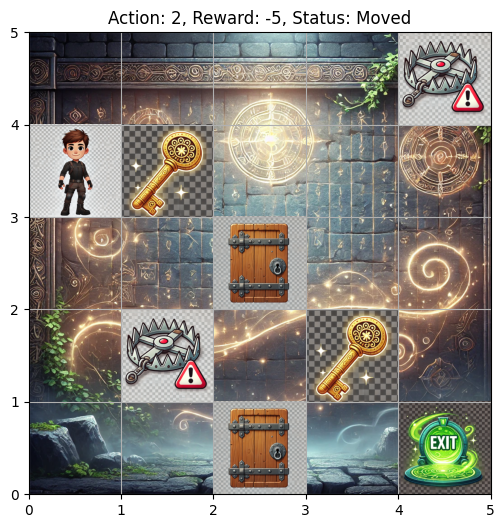

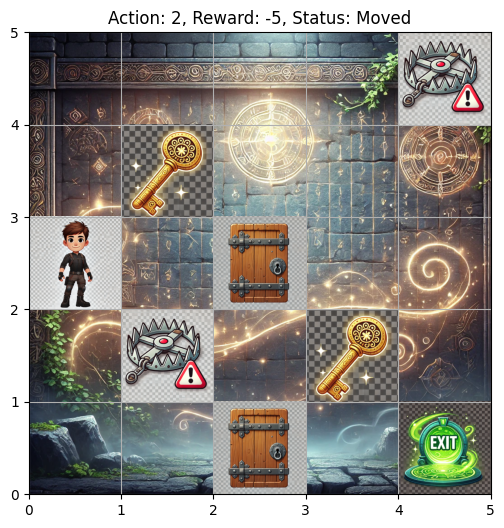

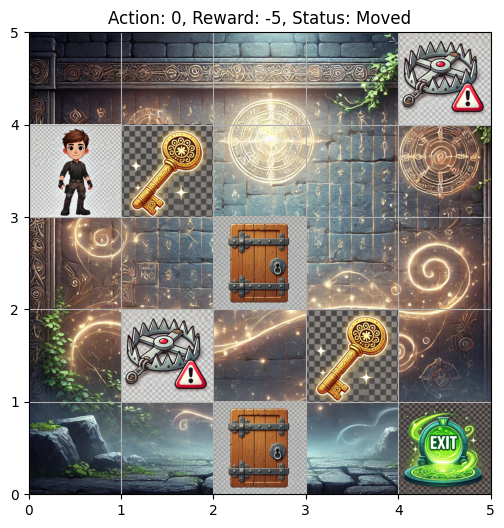

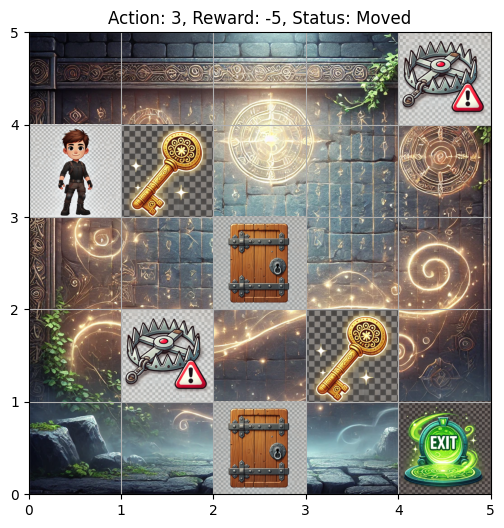

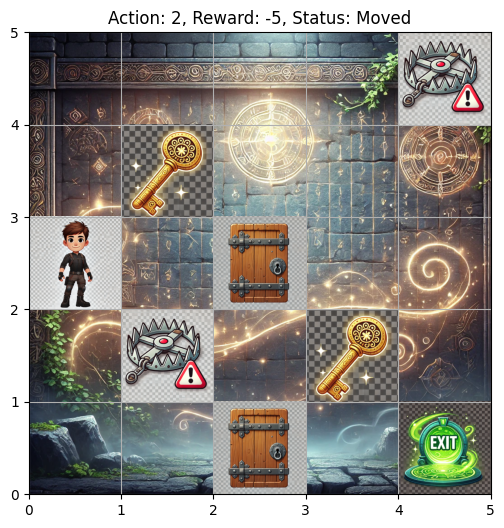

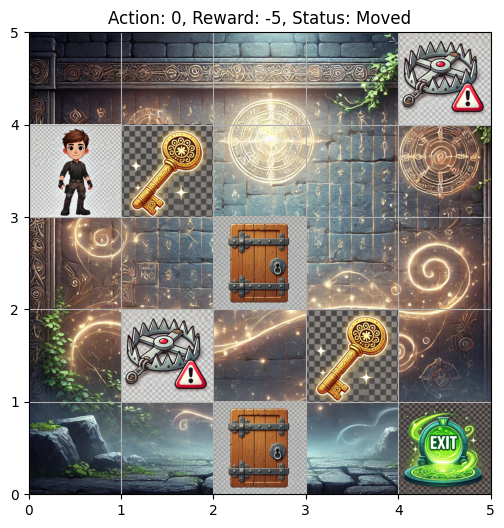

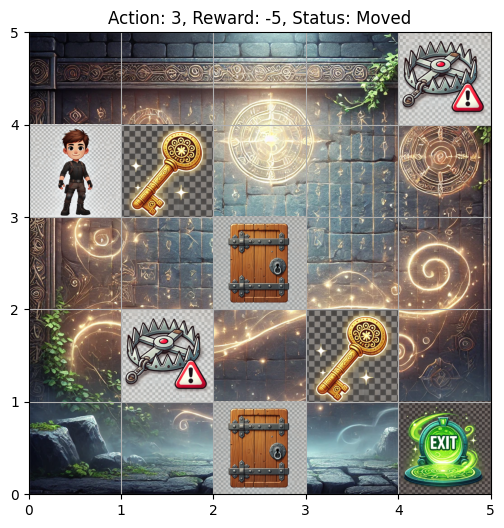

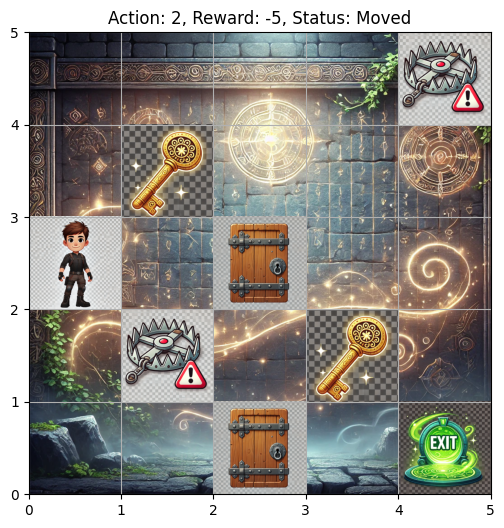

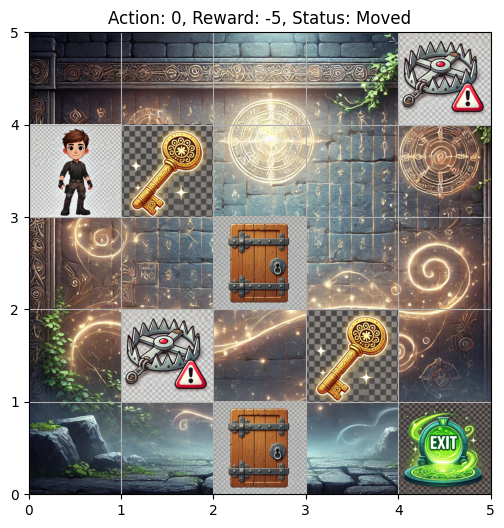

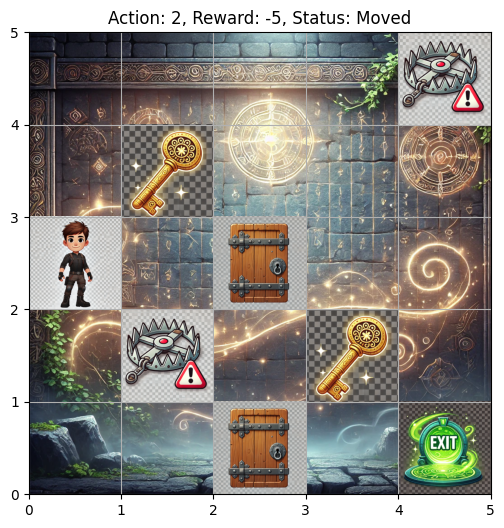

In [ ]:
# Initializing the environment
my_env = EscapeRoomEnv()
my_env.reset()

# Run the environment for random 10 episodes
for episode in range(10):
        action = random.choice(my_env.action_space)
        state, reward, done, status = my_env.step(action)
        # Rendering the env
        my_env.render(action=action, reward=reward, status=status)
        if done:
          print("Escaped")

### References

1. [OpenAI Gym Documentation](https://www.gymlibrary.dev/)  
2. [Matplotlib Documentation](https://matplotlib.org/stable/index.html)   
3. [Python Random Module Documentation](https://docs.python.org/3/library/random.html)  
4. [Reinforcement Learning Introduction](https://spinningup.openai.com/en/latest/spinningup/rl_intro.html)  
5. [Matplotlib: Working with Images](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html)
6. [Reinforcement Learning: An Introduction](http://incompleteideas.net/book/the-book-2nd.html)
7. [Images for Grid World visualization are generated using DALL-E tool]
